# Ejercicios de pérdida impermanente

1- Leer el concepto de pooles de liquidez, su esquema de funcionamiento con producto constante y el cálculo de impremanent loss 

Fórmulas necesarias, siendo f(x), la impermant loss, una función del ratio de variacion relativa de precios como se indica

$$ \Large f{(x)} = 2 * \frac{\sqrt{x}}{1+x}-1 $$

$$ \Large x = \frac{\Delta_{precio_B}}{\Delta_{precio_A}} $$

Referencias: 
    
    * https://academy.binance.com/es/articles/impermanent-loss-explained
    * Con video y ejemplos (Ingles): https://finematics.com/impermanent-loss-explained/
            
    

2- Definir una función que pasando como argumento las variaciones relativas de precios entre los activos A y B, me devuelva el % de pérdida impermanente por proveer liquidez a ese pool respecto al buy&Hold de dichos activos

3- Dados los datos:
    
    * pi_a, pi_b (precios iniciales de activos A y B)
    * pf_a, pf_b (precios finales de activos A y B)
    * monto = el monto invertido en proveer liquidez al pool

In [1]:
# Datos

pi_a, pi_b = 100, 100
pf_a, pf_b = 100, 38

monto = 1000

Calcular:

    3a- El valor de la inversion para un inversor que haga hold 50% y 50% de ambos activos sin proveer liquidez
    3b- La pérdida impermanente por aportar liquidez en ese pool 50% y 50% en activos A y B
    3c- El valor final para un inversor que aporte liquidez al pool 
    3d- Las cantidades iniciales de ambos activos en nominales
    3e- Las cantidades fianles de ambos activos en nominales
        


4- Realizar un gráfico de f(x) es decir de pérdida % impermanente en función de la variacion relativa de precios entre los activos A y B

4b- Realizar el gráfico anterior en el rango de variación relativa de precios de 50% a 200%

# Respuestas

In [2]:
#===========================#
#       Ejercicio 2         #
#===========================#

def imp_loss(price_ratio):
    return 2 * (price_ratio**0.5 / (1 + price_ratio)) - 1

In [3]:
#============================#
#       Ejercicio 3a         #
#============================#

vf_buyHold = monto/2/pi_a * pf_a + monto/2/pi_b * pf_b
vf_buyHold

690.0

In [4]:
#============================#
#       Ejercicio 3b         #
#============================#

perdida_impermanente = imp_loss(pf_b/pf_a)
perdida_impermanente

-0.10660666623638015

In [5]:
#============================#
#       Ejercicio 3c         #
#============================#

vf = vf_buyHold * (1+perdida_impermanente)
vf

616.4414002968977

In [6]:
#============================#
#       Ejercicio 3d         #
#============================#

qi_a, qi_b = monto/2/pi_a, monto/2/pi_b
qi_a, qi_b

(5.0, 5.0)

In [7]:
#============================#
#       Ejercicio 3e         #
#============================#

qf_a, qf_b = vf/2/pf_a, vf/2/pf_b
qf_a, qf_b

(3.0822070014844885, 8.111071056538128)

<AxesSubplot:>

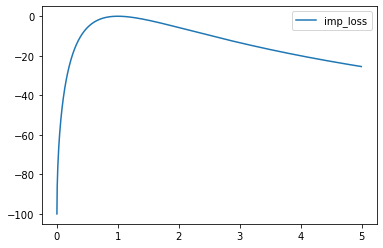

In [8]:
#===========================#
#       Ejercicio 4         #
#===========================#

import numpy as np
import pandas as pd

price_ratios = np.linspace(0, 5, 1000, endpoint=False)
imp_losses = [100 * imp_loss(price_ratio) for price_ratio in price_ratios]

df = pd.DataFrame(data=imp_losses, index=price_ratios, columns=['imp_loss'])
df.plot()

<AxesSubplot:>

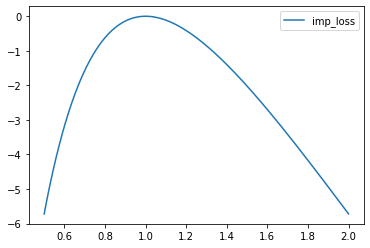

In [10]:
#============================#
#       Ejercicio 4b         #
#============================#

df.loc[0.5:2].plot()